# Part 1: Data Loading

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/ktxdev/AIM-5001/main/Project%202/1.%20Data/M10_Data.csv", header = None)

# Assigning meaningful names to columns
column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "number-of-doors",
                "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height",
                "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
                "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

df.columns = column_names

# Casting numeric data
numeric_columns_with_missing_values = ["price", "peak-rpm", "horsepower", "stroke", "bore", "normalized-losses"]
df[numeric_columns_with_missing_values] = df[numeric_columns_with_missing_values].replace('?', np.nan).apply(pd.to_numeric)

# Converting symbolic column to categorical
df['symboling'] = df["symboling"].astype("category")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Discussion: 
- After replacing all missing values (represented by '?') with NaN, the columns 'price', 'peak-rpm', 'horsepower','stroke', 'bore', and 'normalized-losses' are converted to numerics. This is necessary because these columns are initially represented as strings when the data is loaded, which is an incorrect representation of the dataset.
- Despite the presence of numerical variables in the'symboling' column, it can be classified as a categorical variable due to its restricted range of potential values. Consequently, I have transformed it into a categorical variable within the dataframe.

# Part 2: Explanatory Data Analysis

## Descriptive Statistics

### Continuous Variables

In [23]:
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Discussion of results:
- **normalized-losses:** The normalized-losses attribute has a mean of 122 and a median of 115, indicating a right-skewed distribution for this attribute. The attribute contains a wide range of values, with a minimum observed value of 65 and a maximum observed value of 256. The observation of a standard deviation of 35.44 indicates a greater degree of dispersion from the mean.
- **wheel-base:** The wheel-base characteristic has a mean value of 98.76 and a median value of 97. Given that the mean value exceeds the median value, it can be inferred that the distribution is right-skewed. The attribute has a value range of 86.6 to 120.9, which corresponds to the wheel-base range as indicated in the data dictionary. The standard deviation of 6.02 shows a significant degree of dispersion from the mean.
- **length:** The length property has a mean value of 174.05 and a median of 173.2, indicating that it is slightly right skewed because the mean is greater than the median. The attribute has a minimum value of 141.1 and a maximum value of 208.1, which the data dictionary defines as the full range of allowed values for the attribute. It has a standard deviation of 12.33, which suggests there is a higher degree of dispersion from the mean.
- **width:** The width attribute has a mean of 65.91 and a median of 65.5, indicating that the data is symmetrically skewed. The attribute has a minimum value of 60.3 and a maximum value of 72.3. This variable has a standard deviation of 2.44, indicating that the observations are not too distant from the mean.
- **height:** The height attribute has a mean value of 53.72 and a median of 54.1, indicating that the distribution is left skewed because the median exceeds the mean. The attribute's minimum value is 47.8, and its maximum value is 59.8. The standard deviation of this attribute is 2.44, indicating a greater degree of dispersion within the data attribute.
- **curb-weight:** The curb weight has a minimum of 1488 and a high of 4066, with a standard deviation of 520.68, showing a wide range of data values. The mean of this property is 2555.56, while the median is 2414, indicating a right skewed distribution.
- **engine-size:** The mean value for this property is 126.91, with a median of 120 showing right skewness. The minimum value for the data attribute is 61, and the maximum value is 326. The standard deviation is 41.64, indicating that the observations are far from the mean.
- **bore:**  The mean value is 3.32, while the median is 3.31, indicating that the data is normally distributed. The values range from 2.54 to 3.94, with a standard deviation of 0.27, indicating that the data is not too far from the mean.
- **stroke:** The mean value is 3.26, while the median is 3.29, these values are almost the same indicating that the data is normally distributed. The values range from 2.07 to 4.17, with a standard deviation of 0.32, indicating that the data is not too far from the mean.
- **compression-ratio:** The attribute has a mean value of 10.14 and the median is 9 which is less than the mean, indicating a right-skewed distribution. This atattribute has a minimum value of 7 and a maximum value of 23. It has a standard deviation of 3.97 indicating that the values are far from the mean.
- **horsepower:** The attribute's mean value is 104.26, with a median of 95. The median is less than the mean, hence the distribution is right-skewed. The attribute runs from 48 to 288 with a standard deviation of 39.71. The standard deviation shows that the data is more spread.
- **peak-rpm:** The attribute has a mean value of 5125.37 and a median value of 5200, indicating that the data distribution is skewed to the left. The attribute's minimum value is 4150, and its highest value is 6600. The standard deviation of 479.33 indicates that the observations are significantly dispersed from the mean.
- **city-mpg:** The mean is 25.22, and the median is 24, hence the distribution is right-skewed because the median is lower than the mean. The attribute has values ranging from 13 to 49. The standard deviation of 6.54 indicates that the observations are significantly dispersed from the mean.
- **highway-mpg:** The attribute has a mean value of 30.75 and a median of 30. The median is less than the mean indicating a right-skewed distribution. The attribute has a minimum value of 16 and a maximum of 54. The standard deviation is 6.89 indicating that the observations are significantly dispersed from the mean.
- **price:** The attribute has a mean value of 13207.13 and a median of 10295, which indicates that the distribution is right-skewed. The attribute has a minimum value of 5118 and a maximum value of 45400. The attribute has a standard deviation of 7947.07 indicating that price have a wide dispertion from the mean

### Categorical Variables

#### Symboling

In [32]:
print(df['symboling'].value_counts())
print(df['symboling'].value_counts() / len(df))

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64
symboling
0     0.326829
1     0.263415
2     0.156098
3     0.131707
-1    0.107317
-2    0.014634
Name: count, dtype: float64


**Discussion of results:** This shows that for the dataset, around 32.68% have a symboling of 0, around 26.34% have a symboling of 1, around 15.6% have a symboling of 2 and 25.38% is shared amoung the rest of the symboling.

### Make

In [89]:
print(df['make'].value_counts())
print(df['make'].value_counts() / len(df))


make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64
make
toyota           0.156098
nissan           0.087805
mazda            0.082927
mitsubishi       0.063415
honda            0.063415
volkswagen       0.058537
subaru           0.058537
peugot           0.053659
volvo            0.053659
dodge            0.043902
mercedes-benz    0.039024
bmw              0.039024
audi             0.034146
plymouth         0.034146
saab             0.029268
porsche          0.024390
isuzu            0.019512
jaguar           0.014634
chevrolet        0.014634
alfa-romero      0.014634
rena

**Discussion of results:** This shows that for the dataset, around 15.6% represents toyota, around 8.7% represents nissan, around 8.3% represent mazda and 67.4% is shared amoung the other makes.

### Fuel type

In [34]:
print(df['fuel-type'].value_counts())
print(df['fuel-type'].value_counts() / len(df))

fuel-type
gas       185
diesel     20
Name: count, dtype: int64
fuel-type
gas       0.902439
diesel    0.097561
Name: count, dtype: float64


**Discussion of results:** This shows that for the dataset, around 90.2% have a fuel type of gas and the remaining 9.8% have a fuel type of diesel.

### Aspiration

In [35]:
print(df['aspiration'].value_counts())
print(df['aspiration'].value_counts() / len(df))

aspiration
std      168
turbo     37
Name: count, dtype: int64
aspiration
std      0.819512
turbo    0.180488
Name: count, dtype: float64


**Discussion of results:** This shows that for the dataset, around 81.95% have an aspiration of std and the remaining 18.05% have an aspiration of turbo.

### Number of doors

In [36]:
print(df['number-of-doors'].value_counts())
print(df['number-of-doors'].value_counts() / len(df))

number-of-doors
four    114
two      89
?         2
Name: count, dtype: int64
number-of-doors
four    0.556098
two     0.434146
?       0.009756
Name: count, dtype: float64


**Discussion of results:** This shows that for the dataset, around 55.6% have four doors and 43.4% have two doors. It also shows that approximately 1% of the observations have missing data for this attribute

### Body Style

In [38]:
print(df['body-style'].value_counts())
print(df['body-style'].value_counts() / len(df))

body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
body-style
sedan          0.468293
hatchback      0.341463
wagon          0.121951
hardtop        0.039024
convertible    0.029268
Name: count, dtype: float64


**Discussion of results:** This shows that for the dataset, around 46.8% are sedans, 34.1% are hatchbacks, 12.1% are wagons, 3.9% are hardtop and 2.9% are convertibles.

### Drive Wheels

In [39]:
print(df['drive-wheels'].value_counts())
print(df['drive-wheels'].value_counts() / len(df))

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
drive-wheels
fwd    0.585366
rwd    0.370732
4wd    0.043902
Name: count, dtype: float64


**Discussion of results:** This shows that for the dataset, around 58.53% are front wheel drive, 37.07 are rear wheel drive and the remaining 4.39% are four wheel drive.

### Engine Location

In [40]:
print(df['engine-location'].value_counts())
print(df['engine-location'].value_counts() / len(df))

engine-location
front    202
rear       3
Name: count, dtype: int64
engine-location
front    0.985366
rear     0.014634
Name: count, dtype: float64


**Discussion of results:** This shows that for the dataset, around 98.54% have the engine located in the front and the remaining 1.46% have the engine located in the rear.

### Fuel System

In [41]:
print(df['fuel-system'].value_counts())
print(df['fuel-system'].value_counts() / len(df))

fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64
fuel-system
mpfi    0.458537
2bbl    0.321951
idi     0.097561
1bbl    0.053659
spdi    0.043902
4bbl    0.014634
mfi     0.004878
spfi    0.004878
Name: count, dtype: float64


**Discussion of results:** This shows that for the dataset, around 45.85% have an 'mpfi' fuel system, 32.2% have a '2bbl' fuel system, 9.7% have a 'idi' fuel system and 12.25% is shared amount the remaining 5 fuel systems.

### Engine type

In [42]:
print(df['engine-type'].value_counts())
print(df['engine-type'].value_counts() / len(df))

engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
engine-type
ohc      0.721951
ohcf     0.073171
ohcv     0.063415
dohc     0.058537
l        0.058537
rotor    0.019512
dohcv    0.004878
Name: count, dtype: float64


**Discussion of results:** This shows that for the dataset, around 72.2% have an engine type of 'ohc', 7.32% have an engine type of 'ohcf', 6.34% have an engine type of 'ohcv' and 14.14% have an engine type amoung the remaining 4 engine types.

### Number of Cylinders

In [43]:
print(df['num-of-cylinders'].value_counts())
print(df['num-of-cylinders'].value_counts() / len(df))

num-of-cylinders
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64
num-of-cylinders
four      0.775610
six       0.117073
five      0.053659
eight     0.024390
two       0.019512
three     0.004878
twelve    0.004878
Name: count, dtype: float64


**Discussion of results:** This shows that for the dataset, around 77.56% have 4 cylinders, 11.71% have 6 cylinders, 5.37% have 5 cylinders and 5.36% is shared amount eight, two, three and twelve cylinders.

## Univariate Analysis

### Continuous Variables

#### Normalized Losses

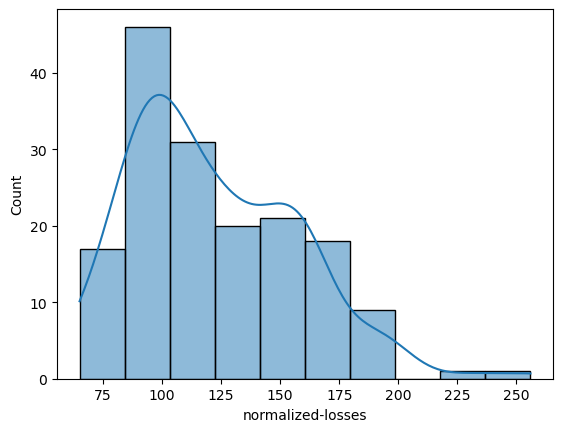

In [69]:
sns.histplot(x = "normalized-losses", data=df, kde=True)
plt.show()

#### Wheel Base

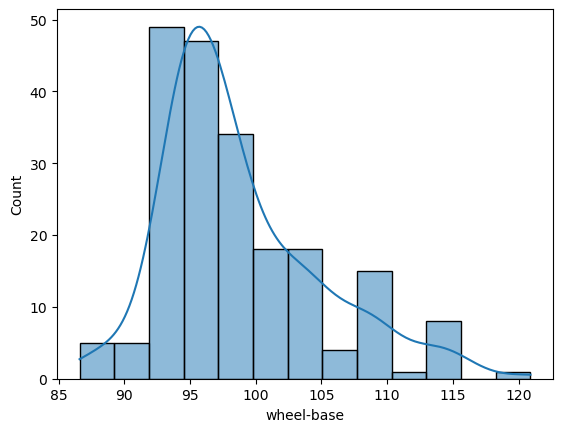

In [70]:
sns.histplot(x = "wheel-base", data=df, kde=True)
plt.show()

#### Length

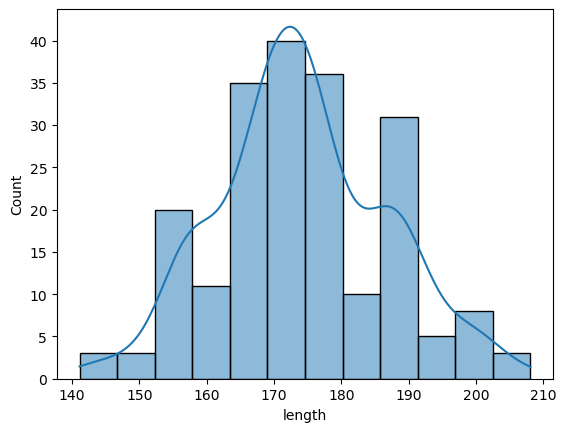

In [71]:
sns.histplot(x = "length", data=df, kde=True)
plt.show()

#### Width

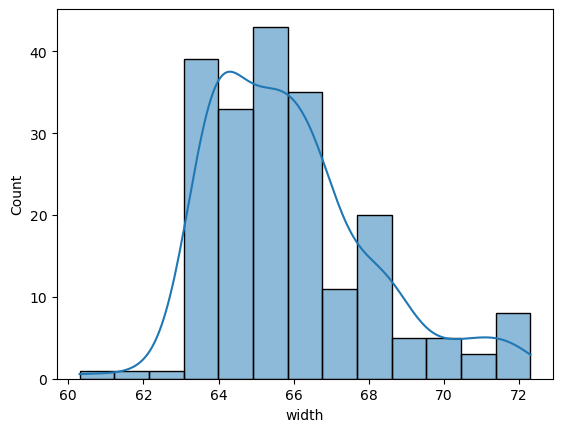

In [72]:
sns.histplot(x = "width", data=df, kde=True)
plt.show()

#### Height

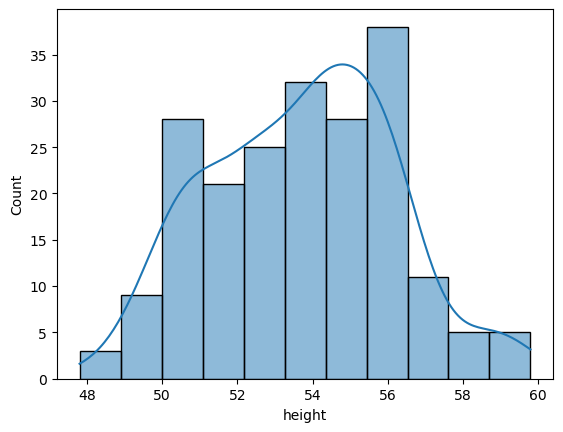

In [73]:
sns.histplot(x = "height", data=df, kde=True)
plt.show()

#### Curb Weight

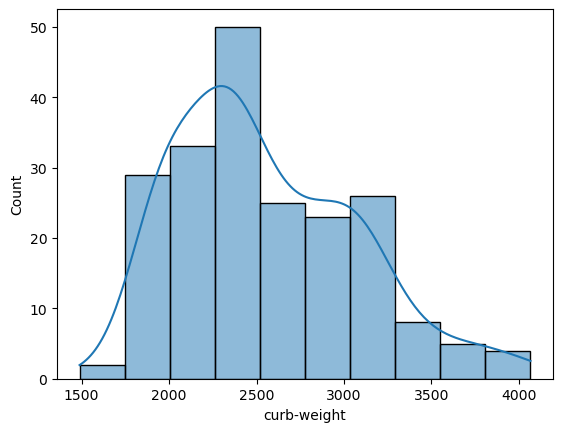

In [75]:
sns.histplot(x = "curb-weight", data=df, kde=True)
plt.show()

#### Engine Size

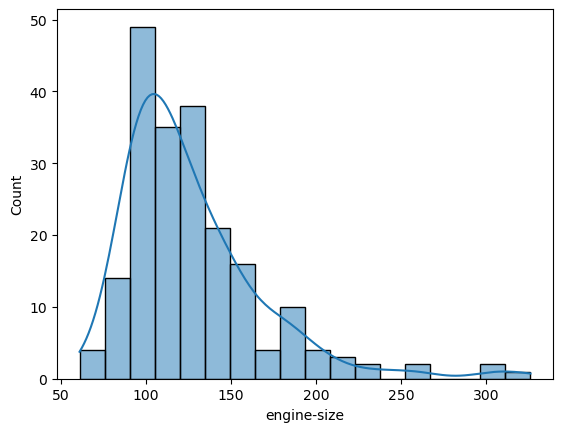

In [76]:
sns.histplot(x = "engine-size", data=df, kde=True)
plt.show()

#### Bore

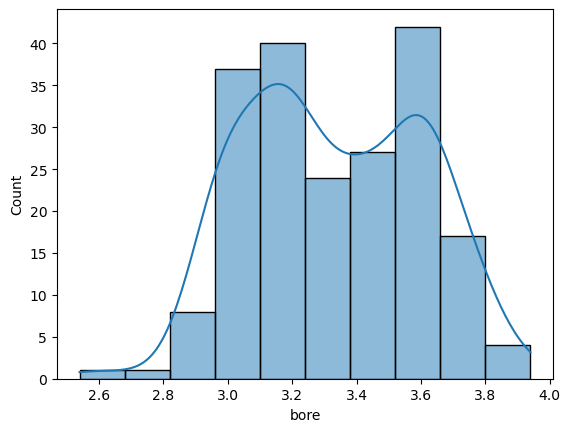

In [77]:
sns.histplot(x = "bore", data=df, kde=True)
plt.show()

#### Stroke

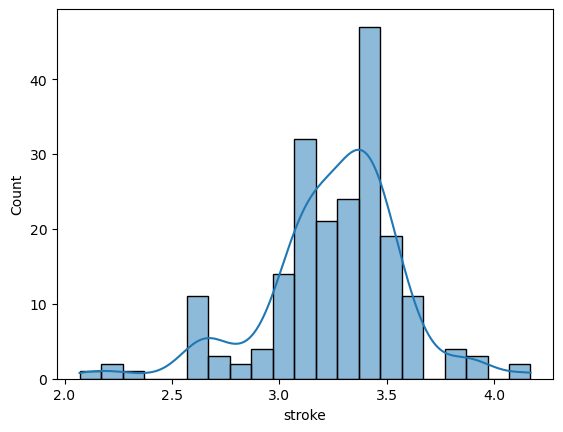

In [78]:
sns.histplot(x = "stroke", data=df, kde=True)
plt.show()

#### Compression Ratio

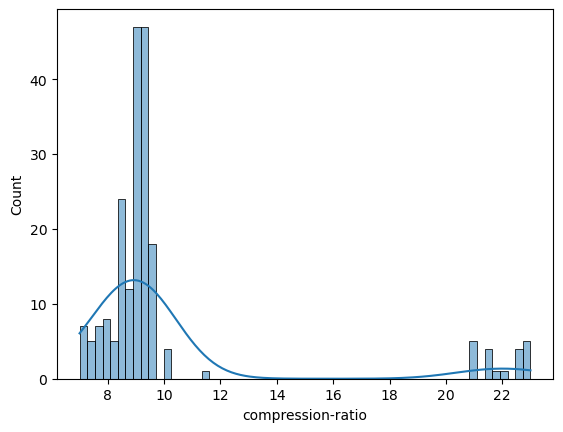

In [80]:
sns.histplot(x = "compression-ratio", data=df, kde=True)
plt.show()

#### Horse Power

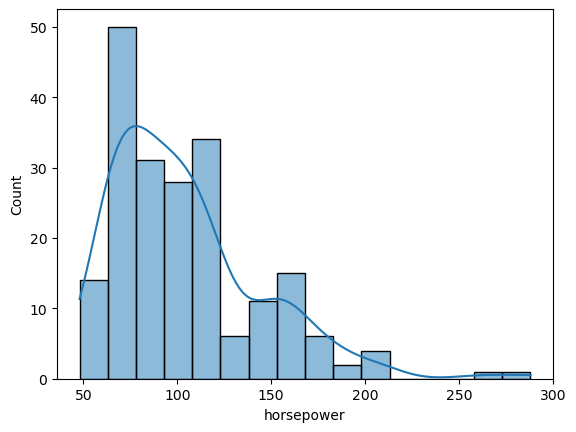

In [82]:
sns.histplot(x = "horsepower", data=df, kde=True)
plt.show()

#### Peak RPM

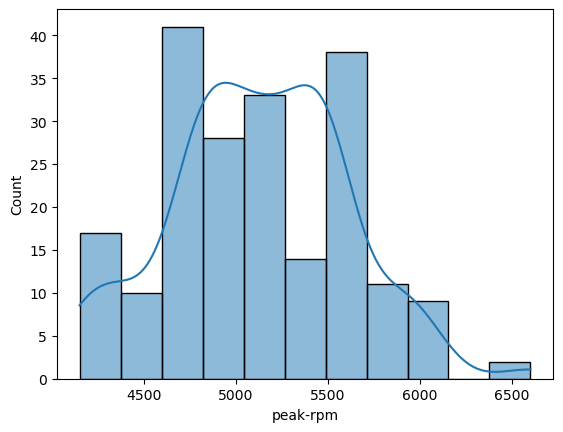

In [84]:
sns.histplot(x = "peak-rpm", data=df, kde=True)
plt.show()

#### City MPG

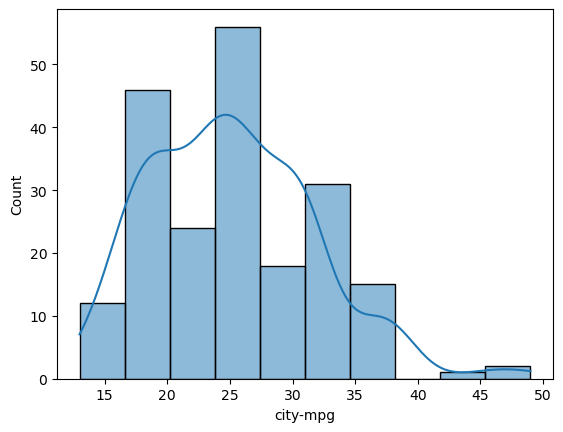

In [85]:
sns.histplot(x = "city-mpg", data=df, kde=True)
plt.show()

#### Highway MPG

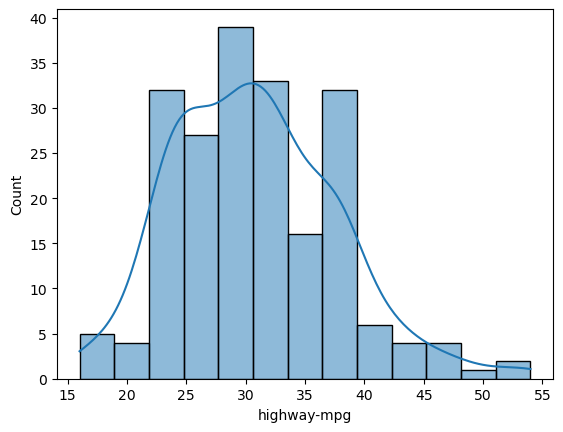

In [86]:
sns.histplot(x = "highway-mpg", data=df, kde=True)
plt.show()

#### Price

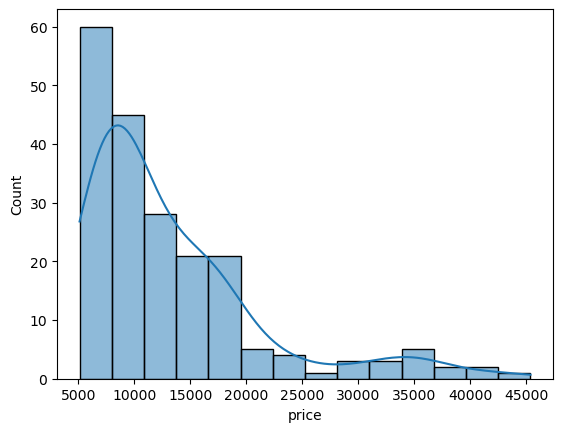

In [87]:
sns.histplot(x = "price", data=df, kde=True)
plt.show()

### Categorical Variables

#### Symboling

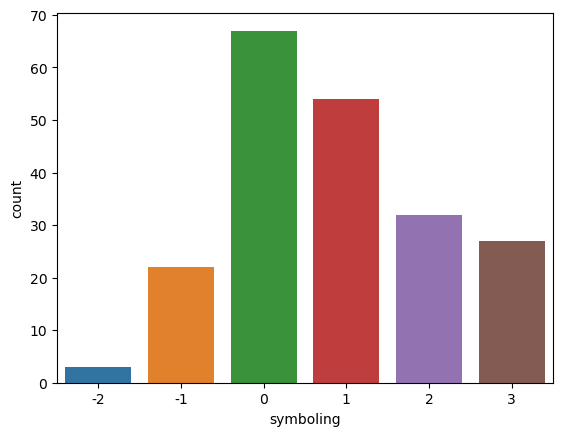

In [53]:
sns.countplot(x = "symboling", data=df)
plt.show()

#### Make

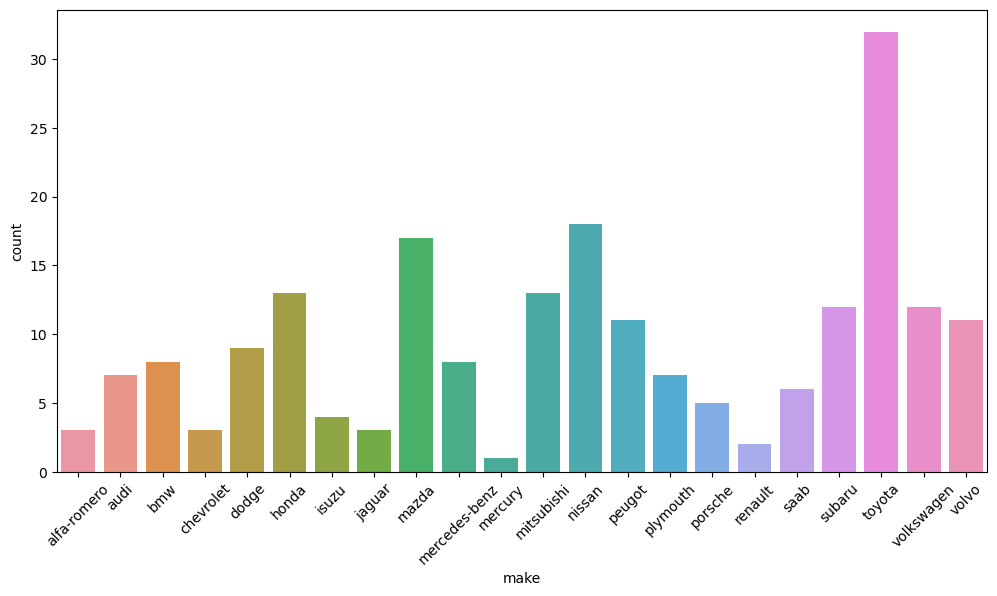

In [56]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(x = "make", data=df)
plt.xticks(rotation = 45)
plt.show()

#### Fuel Type

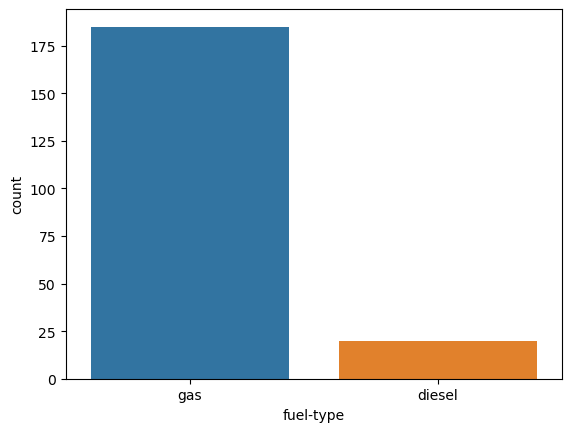

In [57]:
sns.countplot(x = "fuel-type", data=df)
plt.show()

#### Aspiration

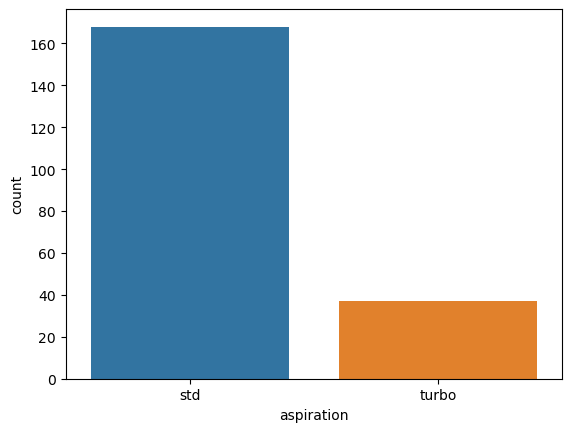

In [58]:
sns.countplot(x = "aspiration", data=df)
plt.show()

#### Number of Doors

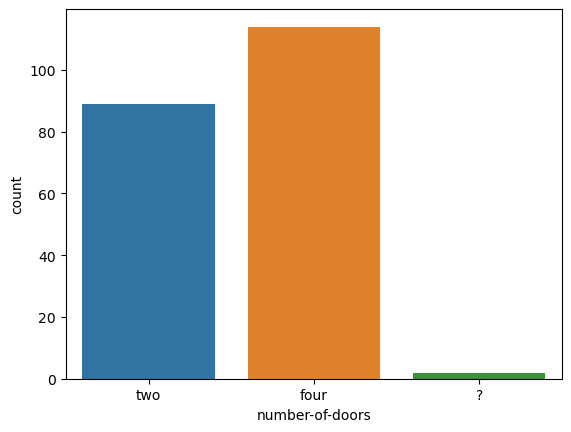

In [59]:
sns.countplot(x = "number-of-doors", data=df)
plt.show()

#### Body Style

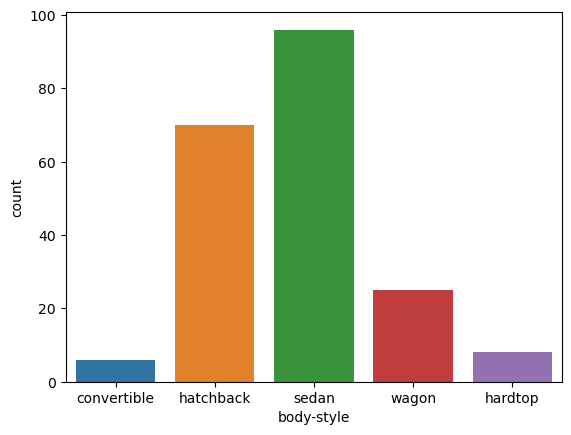

In [60]:
sns.countplot(x = "body-style", data=df)
plt.show()

#### Drive Wheels

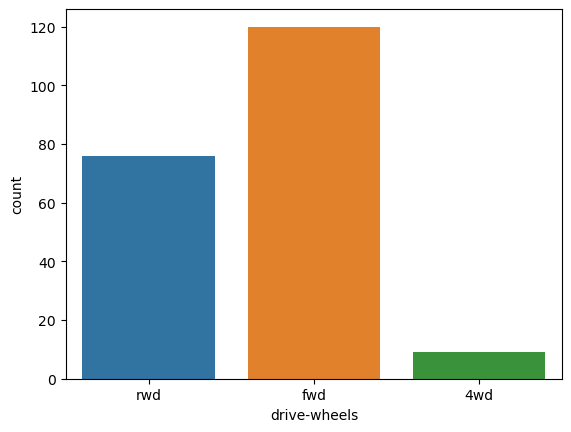

In [61]:
sns.countplot(x = "drive-wheels", data=df)
plt.show()

#### Engine Location

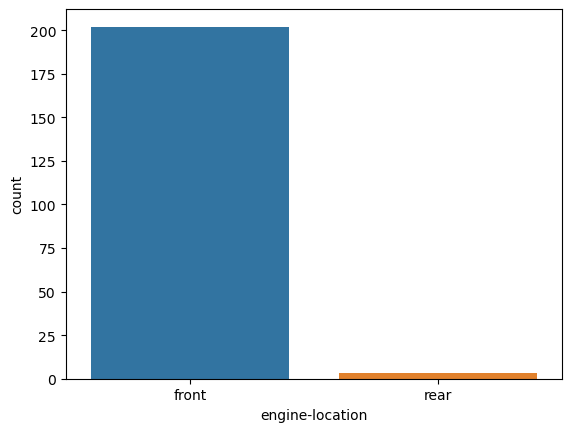

In [62]:
sns.countplot(x = "engine-location", data=df)
plt.show()

#### Fuel System

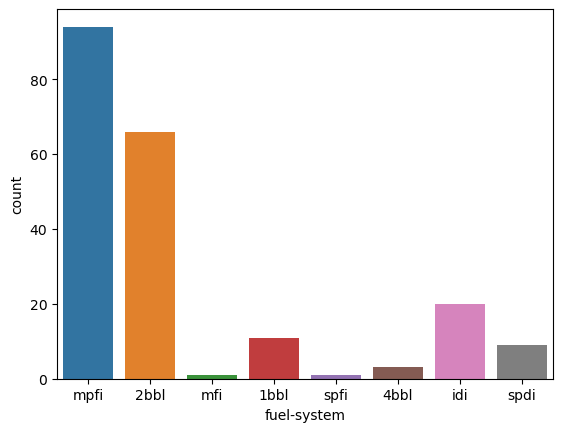

In [63]:
sns.countplot(x = "fuel-system", data=df)
plt.show()

#### Engine Type

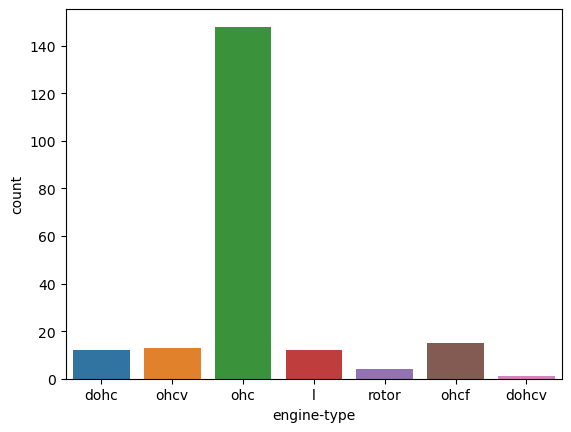

In [64]:
sns.countplot(x = "engine-type", data=df)
plt.show()

#### Number of Cylinders

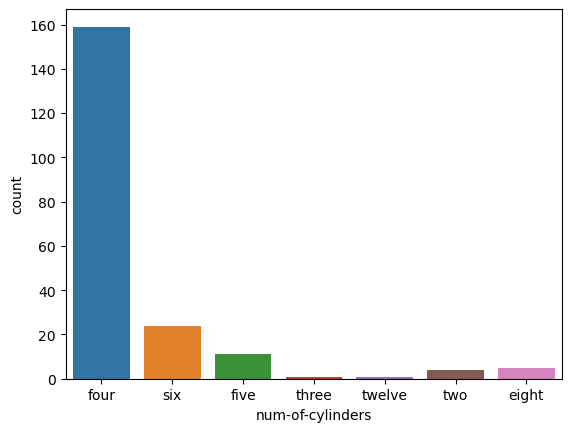

In [65]:
sns.countplot(x = "num-of-cylinders", data=df)
plt.show()